import data

In [6]:
import pandas as pd

CreditCard=pd.read_csv('creditcard.csv')

CreditCard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
from sklearn import preprocessing
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

[0.13501016 0.12577772 0.12031403]


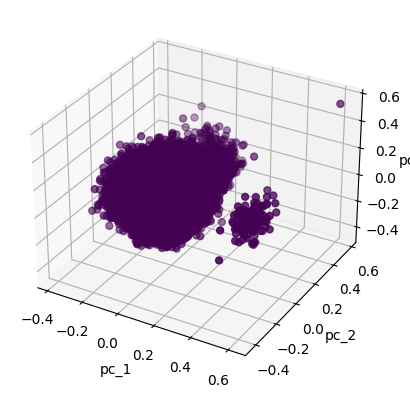

In [8]:
def show_pca_df(df):
	x = df[df.columns[1:30]].to_numpy()
	y = df[df.columns[30]].to_numpy()

	x = preprocessing.MinMaxScaler().fit_transform(x)
	pca = decomposition.PCA(n_components=3)
	pca_result = pca.fit_transform(x)
	print(pca.explained_variance_ratio_)

	pca_df = pd.DataFrame(data=pca_result, columns=['pc_1', 'pc_2', 'pc_3'])
	pca_df = pd.concat([pca_df, pd.DataFrame({'label': y})], axis=1)
	pca_df.to_csv('pca_3d.csv')
	# print(pca_df['pc_2'])

	fig = plt.figure()
	ax = fig.add_subplot(projection='3d')
	ax.scatter(xs=pca_df['pc_1'], ys=pca_df['pc_2'], zs=pca_df['pc_3'], c=pca_df['label'], s=25)
	ax.set_xlabel("pc_1")
	ax.set_ylabel("pc_2")
	ax.set_zlabel("pc_3")
	plt.show()

df = pd.read_csv('creditcard.csv')

show_pca_df(df)

[0.20577961 0.14728955 0.09800455]


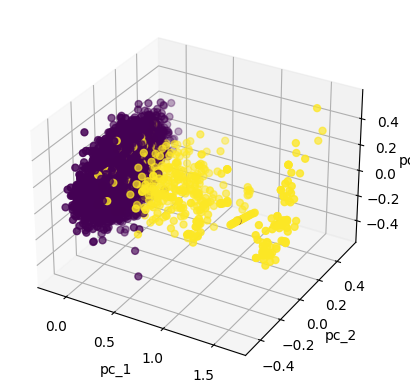

In [9]:
df_anomaly = df[df[df.columns[30]] > 0]
df_normal = df[df[df.columns[30]] == 0].sample(n=df_anomaly.size, random_state=1, axis='index')
df = pd.concat([ df_anomaly, df_normal])

show_pca_df(df)

In [10]:

CreditCard['Class'].describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [11]:
CreditCard['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:


# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for', fontsize=15)
    plt.show()



/tmp/ipykernel_11382/3341036014.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


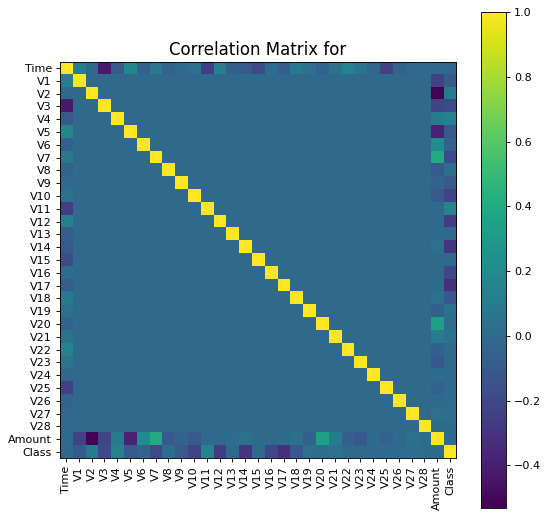

In [13]:
import matplotlib.pyplot as plt
plotCorrelationMatrix(CreditCard, 8)

In [14]:
CreditCard_train=CreditCard.iloc[0:10000,:]


play with pyod

In [15]:
print(CreditCard_train['Class'].value_counts())




0    9962
1      38
Name: Class, dtype: int64


In [16]:


import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager



In [17]:
from pyod.models.ocsvm import OCSVM 


from pyod.models.abod import ABOD
from pyod.models.knn import KNN



In [19]:
outlier_fraction = 492/284807

In [20]:
classifiers = {
     'Angle-based Outlier Detector (ABOD)'   : ABOD(contamination=outlier_fraction),
     'K Nearest Neighbors (KNN)' :  KNN(contamination=outlier_fraction),
     'OCSVM':OCSVM(contamination=outlier_fraction)
}

In [21]:
X_train=CreditCard_train
Y_train=CreditCard_train['Class']
print(Y_train)

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Class, Length: 10000, dtype: int64


10000

In [22]:
clf=OCSVM()
clf.fit(X_train)

OCSVM(cache_size=200, coef0=0.0, contamination=0.1, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_train)

accuracy = accuracy_score(Y_train, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_train, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_train, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_train, y_pred)
print('F1 score: %f' % f1)


/home/jack/anomaly_detection/env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(


Accuracy: 0.896600
Precision: 0.002000
Recall: 0.052632
F1 score: 0.003854


In [25]:
from pyod.models.kde import KDE 

clf=KDE()
clf.fit(X_train)
y_pred = clf.predict(X_train)

accuracy = accuracy_score(Y_train, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_train, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_train, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_train, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.996200
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


/home/jack/anomaly_detection/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from pyod.models.kpca import KPCA 

clf=KPCA()
clf.fit(X_train)
y_pred = clf.predict(X_train)

accuracy = accuracy_score(Y_train, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_train, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_train, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_train, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.899400
Precision: 0.016000
Recall: 0.421053
F1 score: 0.030829


/tmp/ipykernel_23215/3587666481.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral')


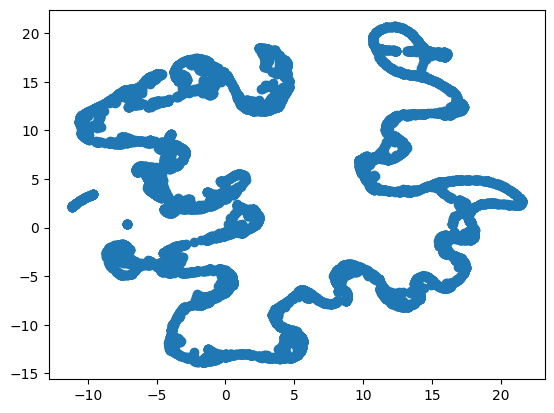

In [60]:
import umap

embedding = umap.UMAP().fit_transform(X_train)

plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral')

without time

In [71]:
X_train_notime = X_train.drop(['Time'], axis=1)

X_train_notime

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.178755,0.596025,0.074131,2.542393,0.450685,-0.179355,0.326365,-0.234949,0.473040,0.331248,...,-0.228112,-0.561559,-0.182781,-0.523241,0.667142,0.015699,-0.067238,0.008709,53.19,0
9996,1.228455,0.049488,1.022099,0.386471,-0.973228,-1.067822,-0.383162,-0.205407,1.699304,-0.531014,...,-0.322912,-0.730294,0.205601,0.686302,-0.071008,0.729846,-0.092276,0.012277,12.18,0
9997,-0.971734,0.744625,2.334822,-0.408046,-0.999231,-0.629294,-0.377212,0.481230,1.599496,-1.586419,...,-0.116821,-0.141219,-0.026115,0.712719,-0.372964,0.750323,-0.107875,0.031272,4.05,0
9998,-1.529666,1.475870,1.507624,-0.662935,-1.037152,-1.159860,-0.303219,0.745766,0.946896,-1.373455,...,-0.197993,-0.634088,0.100631,0.669449,-0.269750,0.611964,-0.169789,0.007846,4.05,0


/tmp/ipykernel_23215/2523904808.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral')


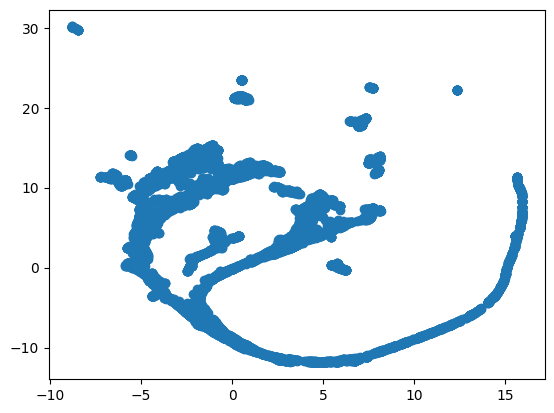

In [72]:
import umap

embedding = umap.UMAP().fit_transform(X_train_notime)

plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral')

In [61]:
print(embedding)

[[ 2.8687615 17.209143 ]
 [ 2.4224823 18.455193 ]
 [ 2.799956  16.641323 ]
 ...
 [15.956782  17.57179  ]
 [15.957582  17.568554 ]
 [15.746743  17.615765 ]]


In [73]:
umap_df=pd.DataFrame(embedding)
umap_df

,0,1
0,5.776269,-11.758257
1,7.598722,7.250240
2,15.115596,0.000667
3,2.786005,-11.588158
4,-1.515663,-5.341220
...,...,...
9995,-3.870507,-3.233243
9996,-4.086421,11.013717
9997,0.227876,11.728555
9998,0.321572,11.782269


In [74]:
Y_train_n=Y_train.reset_index()


In [75]:
Y_train

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Class, Length: 10000, dtype: int64

In [76]:
Zero = Y_train_n[Y_train_n['Class']==0]
Zero['index']
One = Y_train_n[Y_train_n['Class']==1]

In [77]:
umap_zero = umap_df.iloc[Zero['index']]
umap_one = umap_df.iloc[One['index']]
print(umap_zero)

              0          1
0      5.776269 -11.758257
1      7.598722   7.250240
2     15.115596   0.000667
3      2.786005 -11.588158
4     -1.515663  -5.341220
...         ...        ...
9995  -3.870507  -3.233243
9996  -4.086421  11.013717
9997   0.227876  11.728555
9998   0.321572  11.782269
9999   6.542503 -11.441034

[9962 rows x 2 columns]


In [36]:
umap_zero[0]

0       9.304525
1       8.883945
2       9.810236
3       9.237583
4       9.012366
          ...   
9995   -5.535781
9996   -5.530100
9997   -5.529501
9998   -5.542192
9999   -5.434998
Name: 0, Length: 9962, dtype: float32

In [16]:
clf=OCSVM()
clf.fit(umap_df)

OCSVM(cache_size=200, coef0=0.0, contamination=0.1, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)

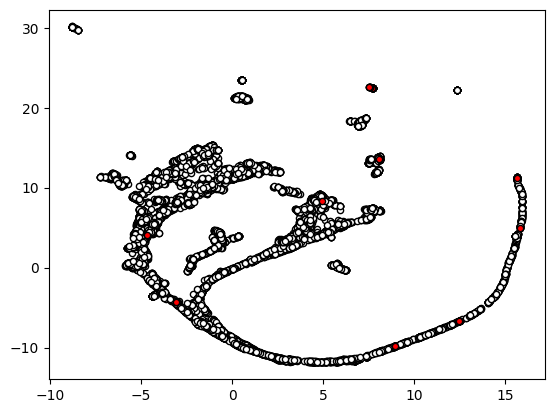

In [78]:
plt.scatter(umap_zero[0], umap_zero[1], c='white', s=20, edgecolor='k')
plt.scatter(umap_one[0], umap_one[1], c='red', s=20, edgecolor='k')
plt.show()


In [44]:
y_pred = clf.predict(umap_df)

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [47]:
accuracy = accuracy_score(Y_train, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_train, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_train, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_train, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.896600
Precision: 0.002000
Recall: 0.052632
F1 score: 0.003854
